# Packages

In [131]:
import random
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import os
import os.path
import csv
from tqdm import tqdm
from networkx.algorithms import bipartite

# Data download

In [132]:
data_eleves = pd.read_csv('/Users/emelinemaire/Desktop/ENSAE/3A/Réseaux/Projet/wetransfer_eleve18-csv_2022-04-06_1753/eleve18.csv', sep = ';')

/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [133]:
data_etab = pd.read_csv('/Users/emelinemaire/Desktop/ENSAE/3A/Réseaux/Projet/etab18.csv', sep = ';')

In [134]:
data_eleves = data_eleves.merge(data_etab, how = 'inner', on = 'NUM_ETAB')

In [5]:
data_eleves

AN_SCO_x  SI_SCO  SEXE  AGE  NATIO_G  REGIME  RESP_G  PCS1 DRES  \
0            2018       1     1   19        1       2       2    47  001   
1            2018       1     1   18        1       2       2    22  001   
2            2018       1     1   19        1       2       2    47  001   
3            2018       1     1   19        1       2       2    21  001   
4            2018       1     1   19        1       2       2    56  001   
...           ...     ...   ...  ...      ...     ...     ...   ...  ...   
5933607      2018       1     2   14        1       0       2    85  976   
5933608      2018       1     2   11        1       2       2    45  976   
5933609      2018       1     1   12        1       0       2    45  976   
5933610      2018       1     1   13        5       0       2    21  976   
5933611      2018       1     1   12        1       0       2    99  976   

         NUM_ETAB  ... APP_REP2015  SECT_SCO  ZONE_EMP  COMINSEE  LIBINSEE  \
0        0010001W  ...           0   0010301      8210     01004  AMBERIEU   
1        0010001W  ...           0   0010301      8210     01004  AMBERIEU   
2        0010001W  ...           0   0010301      8210     01004  AMBERIEU   
3        0010001W  ...           0   0010301      8210     01004  AMBERIEU   
4        0010001W  ...           0   0010301      8210     01004  AMBERIEU   
...           ...  ...         ...       ...       ...       ...       ...   
5933607  9760379H  ...           1   -------      0099     97604    BOUENI   
5933608  9760379H  ...           1   -------      0099     97604    BOUENI   
5933609  9760379H  ...           1   -------      0099     97604    BOUENI   
5933610  9760379H  ...           1   -------      0099     97604    BOUENI   
5933611  9760379H  ...           1   -------      0099     97604    BOUENI   

         POPINSEE TYP_COMM TRANCHUU SI_SOURCE APP_ZUS  
0           11436       21        3         1       0  
1           11436       21        3         1       0  
2           11436       21        3         1       0  
3           11436       21        3         1       0  
4           11436       21        3         1       0  
...           ...      ...      ...       ...     ...  
5933607         0        -        2         1       0  
5933608         0        -        2         1       0  
5933609         0        -        2         1       0  
5933610         0        -        2         1       0  
5933611         0        -        2         1       0  

[5933612 rows x 42 columns]

# Data preparation

In [135]:
dep_idf = ['095', '078', '091', '092', '093', '094', '077', '075']

In [136]:
idf_18 = data_eleves[data_eleves['DRES'].isin(dep_idf)]

In [9]:
idf_18.loc[(idf_18['DRES'].isin(acV)),
       'Academie'] = 'Versailles'

idf_18.loc[(idf_18['DRES'].isin(acC)),
       'Academie'] = 'Créteil'

idf_18.loc[(idf_18['DRES'] == '075'),
       'Academie'] = 'Paris'

/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [10]:
idf_18['Academie'].unique()

array(['Créteil', 'Versailles', 'Paris'], dtype=object)

In [7]:
etabs = [i for i in idf_18['NUM_ETAB'].unique()]
len(etabs)

3735

In [8]:
idf_18['PCS1'].unique()

array([43, 38, 56, 37, 69, 34, 33, 52, 42, 22, 62, 46, 67, 47, 55, 53, 99,
       77, 63, 85, 54, 35, 78, 31, 45, 21, 84, 23, 74, 10, 48, 64, 72, 65,
       81, 86, 71, 44, 75, 68, 83])

In [9]:
lower_classes = [10, 21, 22, 52, 53, 54, 55, 
                 56, 62, 63, 64, 
                 65, 67, 68, 69, 81, 85, 86]

In [10]:
idf_18.loc[(idf_18['PCS1'].isin(lower_classes)), 'lwr_class'] = 1

/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [11]:
idf_18['lwr_class'].unique()

array([nan,  1.])

### Création des attributs

In [13]:
list_etab = {}
list_attr = [[]]*3735
counter = 0 

for etab in tqdm(etabs):
    #etab = {'etab' : i}
    cond = "NUM_ETAB == " + "'" + etab + "'"
    df_etab = idf_18.query(cond)
    #df_etab.loc[(df_etab['PCS1'].isin(lower_classes)), 'lwr_class'] = 1
    df_etab['perc_french'] = len(df_etab.query("NATIO_G == 1"))/len(df_etab)
    df_etab['perc_lwrclass'] = len(df_etab[df_etab['PCS1'].isin(lower_classes)])/len(df_etab)
    df_etab['sex_ratio'] = len(df_etab.query("SEXE == 2"))/len(df_etab)
    df_etab['taille'] = len(df_etab)
    attrs = {'class' :df_etab['perc_lwrclass'].max(), 'french' : df_etab['perc_french'].max(),
             'sex' : df_etab['sex_ratio'].max(), 'size' : df_etab['taille'].max()}
    list_etab[etab] = attrs
    list_attr[counter].append([etab, df_etab['perc_lwrclass'].max(), 
                      df_etab['perc_french'].max(), df_etab['sex_ratio'].max()])
    counter = counter+1

  0%|                                                  | 0/3735 [00:00<?, ?it/s]/var/folders/z1/w6v_285x6wv5slq1n63cc2980000gn/T/ipykernel_3537/67930636.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etab['perc_french'] = len(df_etab.query("NATIO_G == 1"))/len(df_etab)
/var/folders/z1/w6v_285x6wv5slq1n63cc2980000gn/T/ipykernel_3537/67930636.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etab['perc_lwrclass'] = len(df_etab[df_etab['PCS1'].isin(lower_classes)])/len(df_etab)
/var/folders/z1/w

In [116]:
df2 = df.groupby(by = ['NUMETABP', 'NUM_ETAB']).size().reset_index(name='weights')
df2['edges'] = '(' + df2['NUMETABP'] + ',' + df2['NUM_ETAB']+ ')'
#test = test[['edges', 'weights']]
df2

NUMETABP  NUM_ETAB  weights                edges
0      0010026Y  0920134W        1  (0010026Y,0920134W)
1      0010088R  0920889S        1  (0010088R,0920889S)
2      0010974D  0010013J        1  (0010974D,0010013J)
3      0011011U  0910812N        1  (0011011U,0910812N)
4      0011067E  0951399E        1  (0011067E,0951399E)
...         ...       ...      ...                  ...
12534  9830656W  0782539L        1  (9830656W,0782539L)
12535  9840208D  0940123Y        1  (9840208D,0940123Y)
12536  9840332N  0781951X        1  (9840332N,0781951X)
12537  9840340X  0951147F        1  (9840340X,0951147F)
12538  9840466J  0750656F        1  (9840466J,0750656F)

[12539 rows x 4 columns]

In [17]:
list_etab

{'0010013J': {'class': 0.0, 'french': 1.0, 'sex': 0.0},
 '0010014K': {'class': 0.0, 'french': 1.0, 'sex': 1.0},
 '0010021T': {'class': 0.0, 'french': 1.0, 'sex': 1.0},
 '0010034G': {'class': 1.0, 'french': 1.0, 'sex': 0.0},
 '0010069V': {'class': 0.0, 'french': 1.0, 'sex': 1.0},
 '0010070W': {'class': 0.0, 'french': 1.0, 'sex': 0.0},
 '0011194T': {'class': 0.0, 'french': 1.0, 'sex': 0.0},
 '0020011B': {'class': 0.42857142857142855,
  'french': 1.0,
  'sex': 0.8571428571428571},
 '0020012C': {'class': 0.46153846153846156,
  'french': 1.0,
  'sex': 0.7692307692307693},
 '0020014E': {'class': 0.0, 'french': 1.0, 'sex': 0.0},
 '0020022N': {'class': 1.0, 'french': 1.0, 'sex': 1.0},
 '0020025S': {'class': 0.6666666666666666,
  'french': 1.0,
  'sex': 0.6666666666666666},
 '0020031Y': {'class': 1.0,
  'french': 0.6666666666666666,
  'sex': 0.3333333333333333},
 '0020032Z': {'class': 1.0, 'french': 1.0, 'sex': 0.0},
 '0020038F': {'class': 0.0, 'french': 1.0, 'sex': 1.0},
 '0020048S': {'class':

In [110]:
liste_seconde = ['221114', '221121', '221131', '221141']
liste_troisième = ['211600', '243400']
df = idf_18[idf_18['MEFST6'].isin(liste_seconde)]
df = df[df['MEFST6P'].isin(liste_troisième)]

In [27]:
df['NATUREP']

Series([], Name: NATUREP, dtype: object)

In [111]:
df = df[df['NATUREP'] == '340']

In [112]:
df['NATURE'].unique()

array([302, 306, 300, 301, 310, 315, 320, 370, 340])

In [113]:
df = df[df['NATURE'] != 340]

In [114]:
df

AN_SCO_x  SI_SCO  SEXE  AGE  NATIO_G  REGIME  RESP_G  PCS1 DRES  \
5397         2018       1     1   15        1       2       2    43  093   
58251        2018       1     1   15        1       0       2    47  093   
71184        2018       1     1   16        1       3       2    56  092   
97389        2018       1     1   15        1       3       2    54  077   
97403        2018       1     2   15        1       3       2    54  094   
...           ...     ...   ...  ...      ...     ...     ...   ...  ...   
5637517      2018       1     2   15        1       2       2    38  077   
5637590      2018       1     2   15        1       0       2    72  077   
5709737      2018       1     2   15        1       2       2    85  093   
5721565      2018       1     2   15        1       0       2    43  095   
5750622      2018       1     1   14        1       0       2    38  091   

         NUM_ETAB  ... SECT_SCO  ZONE_EMP  COMINSEE  LIBINSEE  POPINSEE  \
5397     0010013J  ...  0010103      8203     01053  BOURG-EN     40666   
58251    0020012C  ...  0020302      2205     02168  CHATEAU-     14967   
71184    0020050U  ...  0020411      2231     02691  SAINT-QU     59066   
97389    0021869W  ...  0020302      2205     02168  CHATEAU-     14967   
97403    0021869W  ...  0020302      2205     02168  CHATEAU-     14967   
...           ...  ...      ...       ...       ...       ...       ...   
5637517  6200002H  ...  6200100      9411     2A004   AJACCIO     52880   
5637590  6200002H  ...  6200100      9411     2A004   AJACCIO     52880   
5709737  9720004X  ...  9720000      0299     97209  FORT-DE-     94049   
5721565  9720350Y  ...  9720000      0299     97230  LA TRINI     12890   
5750622  9730108E  ...  9730000      0399     97304    KOUROU     19107   

         TYP_COMM TRANCHUU SI_SOURCE APP_ZUS lwr_class  
5397           21        5         1       0       NaN  
58251          21        4         1       0       NaN  
71184          21        5         1       0       1.0  
97389          21        4         1       0       1.0  
97403          21        4         1       0       1.0  
...           ...      ...       ...     ...       ...  
5637517        11        5         1       0       NaN  
5637590        11        5         1       0       NaN  
5709737        21        6         1       0       1.0  
5721565        22        4         1       0       NaN  
5750622        11        3         1       0       NaN  

[101493 rows x 43 columns]

In [34]:
df['NATUREP'].unique()

array(['340'], dtype=object)

### Description des données

In [21]:
len(df)

101506

In [22]:
len(df['NUM_ETAB'].unique()) #nombre de lycées

728

In [23]:
len(df['NUMETABP'].unique()) #nombre de collèges

1682

In [24]:
print(len(df[df['PCS1'].isin(lower_classes)])/len(df))

0.4450771382972435


In [25]:
print(len(df.query("SEXE == 2"))/len(df))

0.534323094201328


In [26]:
print(len(df.query("NATIO_G == 1"))/len(df))

0.9237582014856265


In [27]:
print(len(df.query("Academie == 'Créteil'"))/len(df))

0.37420448052331884


In [28]:
print(len(df.query("Academie == 'Versailles'"))/len(df))

0.47867121155399683


In [29]:
print(len(df.query("Academie == 'Paris'"))/len(df))

0.14712430792268438


# Création du réseau

In [36]:
df.columns

Index(['AN_SCO_x', 'SI_SCO', 'SEXE', 'AGE', 'NATIO_G', 'REGIME', 'RESP_G',
       'PCS1', 'DRES', 'NUM_ETAB', 'MEFST6', 'GR_NSF', 'OPT1', 'OPT2', 'OPT3',
       'OPT4', 'SECTEURP', 'NUMETABP', 'GEOSTATP', 'NATUREP', 'MEFST6P',
       'GR_NSFP', 'AN_SCO_y', 'GEOSTAT', 'MINISTER', 'SECTEUR', 'TYP_ETAB',
       'CONTRA_E', 'NATURE', 'ETABSENS', 'APP_ECLAIR', 'APP_REPPLUS',
       'APP_REP2015', 'SECT_SCO', 'ZONE_EMP', 'COMINSEE', 'LIBINSEE',
       'POPINSEE', 'TYP_COMM', 'TRANCHUU', 'SI_SOURCE', 'APP_ZUS',
       'lwr_class'],
      dtype='object')

In [121]:
eleves_G = nx.Graph()  # on commence par générer un réseau vide

eleves_G.add_nodes_from(df.iloc[:,17], bipartite=0) # collèges
eleves_G.add_nodes_from(df.iloc[:,9], bipartite=1) # lycées

In [55]:
nx.is_bipartite(eleves_G)

True

In [39]:
nx.info(eleves_G)

'Graph with 2408 nodes and 0 edges'

In [123]:
eleves_G.add_weighted_edges_from([(NUMETABP, NUM_ETAB, weight) for (NUMETABP, NUM_ETAB, weight) 
                         in df2[['NUMETABP', 'NUM_ETAB', 'weights']].to_numpy()])
print(nx.info(eleves_G))

Graph with 2408 nodes and 12539 edges


In [57]:
nx.is_bipartite(eleves_G)

True

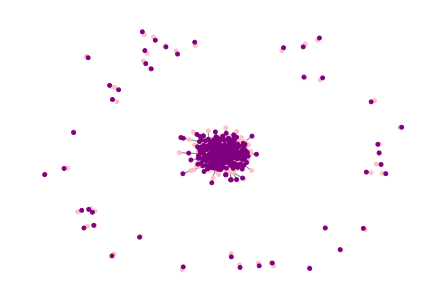

In [125]:
node_color = []

# then, for each node in the graph
for node in eleves_G.nodes(data=True):
    # if the node has the attribute bipartite = 0 (collèges), make it red
    if node[1]['bipartite']==0:
        node_color.append('pink')
    # if the node has the attribute bipartite = 1 (lycées), make it blue
    elif node[1]['bipartite']==1:
        node_color.append('purple')


nx.draw(eleves_G, with_labels=False, node_size = 15, node_color=node_color, edge_color = "gray")

In [126]:
nx.set_node_attributes(eleves_G, list_etab)

In [127]:
nx.is_bipartite(eleves_G)

True

In [77]:
collèges_nodes = {n for n, d in eleves_G.nodes(data=True) if d["bipartite"] == 0} 
lycées_nodes = set(eleves_G) - collèges_nodes

In [48]:
nx.degree(eleves_gG0, lycées_nodes)

DegreeView({'0890005X': 1, '0940891H': 9, '0511130B': 1, '0941918Z': 21, '0930136T': 21, '0950646L': 28, '0783297K': 12, '0760110G': 1, '0721094Y': 4, '0782587N': 18, '0753842U': 25, '0600015R': 3, '0920131T': 32, '0753838P': 73, '0772310T': 19, '0754325U': 2, '0180561M': 1, '0770940D': 9, '0942269F': 11, '0772324H': 6, '0440024M': 1, '0770927P': 37, '0930119Z': 14, '0750660K': 36, '0800009A': 1, '0600009J': 3, '0750673Z': 64, '0781664K': 17, '0921166T': 28, '0783289B': 18, '0570058D': 1, '0290023T': 1, '0440279P': 1, '0460039T': 1, '0510006E': 5, '0771237B': 23, '0771720B': 12, '0270044B': 4, '0951763A': 29, '0271051W': 6, '0271585B': 1, '0350776D': 1, '0941470M': 17, '0130002G': 1, '0870864S': 1, '0941711Z': 3, '0021870X': 1, '0132495S': 1, '0450049J': 1, '0930830X': 36, '0772296C': 16, '0593114P': 1, '0850032Y': 2, '0941974K': 16, '0750714U': 63, '0610698C': 2, '0783288A': 35, '0910838S': 1, '0370035M': 1, '0941719H': 11, '0400027M': 1, '0771663P': 15, '0560200N': 1, '0952158E': 9, 

Densité

In [78]:
len(eleves_G.edges())/(len(collèges_nodes)*len(lycées_nodes))

0.010260316982342501

In [79]:
nx.degree(eleves_G, lycées_nodes)

DegreeView({'0130042A': 1, '0180006J': 1, '0440021J': 1, '0772332S': 10, '0941470M': 17, '0411071S': 7, '0271582Y': 1, '0940137N': 3, '0942269F': 11, '0771512A': 21, '0770931U': 33, '0890003V': 1, '0951788C': 32, '0753946G': 6, '0381683Y': 1, '0750711R': 62, '0911828T': 44, '0753883N': 6, '0772229E': 25, '0772276F': 21, '0180005H': 1, '0920928J': 17, '0290335G': 1, '0940118T': 26, '0750700D': 33, '0932046U': 9, '0952208J': 10, '0922397F': 23, '0932120Z': 39, '0350797B': 1, '0342225J': 1, '0910819W': 15, '0080081V': 1, '0950641F': 35, '0912117G': 30, '0782563M': 55, '0753231E': 2, '0750330B': 11, '0782132U': 49, '0912342B': 10, '0754401B': 6, '0941972H': 30, '0922249V': 21, '0931565W': 12, '0781861Z': 23, '0910815S': 18, '0750652B': 57, '0510068X': 1, '0940121W': 34, '0755352K': 2, '0770924L': 16, '0950762M': 36, '0920131T': 32, '9720004X': 1, '0930834B': 39, '0133525L': 3, '0755709Y': 24, '0911945V': 16, '0920142E': 19, '0030038A': 1, '0890070T': 2, '0772737G': 30, '0010013J': 1, '0782

In [80]:
nx.is_bipartite(eleves_G)

True

In [129]:
nx.get_edge_attributes(eleves_G, 'weight')

{('0010974D', '0010013J'): 1,
 ('0021826Z', '0020012C'): 1,
 ('0021826Z', '0920141D'): 1,
 ('0021826Z', '0921156G'): 1,
 ('0920624D', '0020050U'): 1,
 ('0920624D', '0920135X'): 9,
 ('0920624D', '0920145H'): 4,
 ('0920624D', '0920146J'): 9,
 ('0920624D', '0920904H'): 6,
 ('0920624D', '0920906K'): 4,
 ('0920624D', '0920907L'): 3,
 ('0920624D', '0921166T'): 4,
 ('0920624D', '0922249V'): 63,
 ('0920624D', '0940580V'): 1,
 ('0772714G', '0021869W'): 1,
 ('0772714G', '0750654D'): 1,
 ('0772714G', '0750693W'): 1,
 ('0772714G', '0770924L'): 1,
 ('0772714G', '0770931U'): 36,
 ('0772714G', '0771237B'): 3,
 ('0772714G', '0771246L'): 8,
 ('0772714G', '0772229E'): 21,
 ('0772714G', '0772275E'): 2,
 ('0772714G', '0772292Y'): 7,
 ('0772714G', '0772685A'): 1,
 ('0772714G', '0772688D'): 4,
 ('0772714G', '0922653J'): 1,
 ('0772714G', '0932638M'): 1,
 ('0772714G', '0940822H'): 3,
 ('0950751A', '0021869W'): 1,
 ('0950751A', '0271053Y'): 1,
 ('0950751A', '0770918E'): 1,
 ('0950751A', '0950647M'): 1,
 ('0950

In [52]:
len(eleves_G.edges())/(len(collèges_nodes)*len(lycées_nodes)) #densité du graph pondéré

0.12077942878061855

In [50]:
eleves_G.edges(data = True)

EdgeDataView([('0021826Z', '0922020W', {'weight': 2}), ('0021826Z', '0951138W', {'weight': 1}), ('0021826Z', '0771926A', {'weight': 1}), ('0021826Z', '0921394R', {'weight': 1}), ('0021826Z', '0922657N', {'weight': 1}), ('0021826Z', '0921543C', {'weight': 1}), ('0021826Z', '0922630J', {'weight': 1}), ('0021826Z', '0921621M', {'weight': 2}), ('0021826Z', '0921494Z', {'weight': 2}), ('0021826Z', '0922256C', {'weight': 1}), ('0021826Z', '0922645A', {'weight': 1}), ('0021826Z', '0950711G', {'weight': 1}), ('0021826Z', '0922565N', {'weight': 1}), ('0021826Z', '7200160L', {'weight': 1}), ('0021826Z', '0920852B', {'weight': 1}), ('0021826Z', '0921219A', {'weight': 1}), ('0021826Z', '0780714C', {'weight': 1}), ('0021826Z', '0922662U', {'weight': 1}), ('0021826Z', '0783301P', {'weight': 1}), ('0021826Z', '0920594W', {'weight': 1}), ('0021826Z', '0921541A', {'weight': 1}), ('0021826Z', '0920882J', {'weight': 1}), ('0021826Z', '0270033P', {'weight': 1}), ('0021826Z', '0752533W', {'weight': 1}), ('

In [93]:
lycées_nodes

TypeError: 'set' object is not subscriptable

In [130]:
nx.write_gexf(eleves_G, 'projet_o.gexf')
#On exporte le réseau ainsi que les attributs pour pouvoir le traiter 
#sur Gephi